In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"#让所有不是在最后一行的单个变量也能print

# Adaboost与随机森林

## pandasprofilling

In [1]:
import pandas as pd
merge_loan = pd.read_csv("merge_loan.csv")

In [3]:
import numpy as np
import pandas_profiling

#To display the report in a Jupyter notebook, run:

merge_loan.profile_report(style={'full_width':True})
#To retrieve the list of variables which are rejected due to high correlation:

#profile = df.profile_report()

## 热力图

In [22]:
feature_group1=merge_loan[['I_1', 'I_2', 'I_3', 'P_1', 'P_2', 'P_3','log_sum_send_amount','lend_period','view_no','30days_overdue_times','is_30days_overdue']]

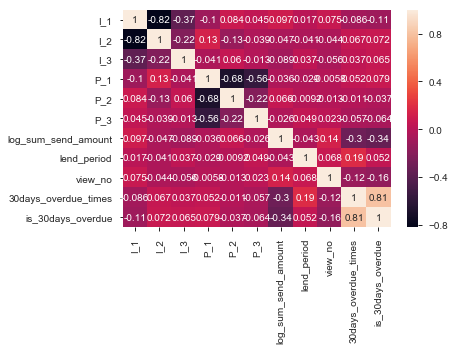

In [23]:
import seaborn as sns
sns.heatmap(feature_group1.corr(),annot=True)

In [24]:
feature_group2=merge_loan[['sum_his_lend_amount', 'mean_his_overdue_times', 'sum_before_30_trans_amount', 'mean_every_day_trans_amount', 'cv_mean_every_day_trans_amount', 'sum_every_trans_amount','on_sale_rate','sum_before_30_trans_count','sum_every_trans_count','nearest_trans_day','mean_every_trans_trans_amount','is_30days_overdue']]

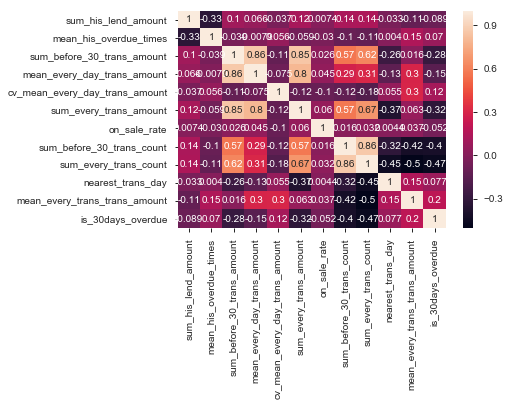

In [25]:
sns.heatmap(feature_group2.corr(),annot=True)

In [ ]:
#可以看到按相关性相对高的特征结合 特征间相关系数都特别低 说明特征离散得不错

In [26]:
feature_group3=merge_loan[['bankcard_credit_count','bankcard_debit_count','wallet_weixin_count','wallet_alipay_count','alipay_huabei_count','is_30days_overdue']]

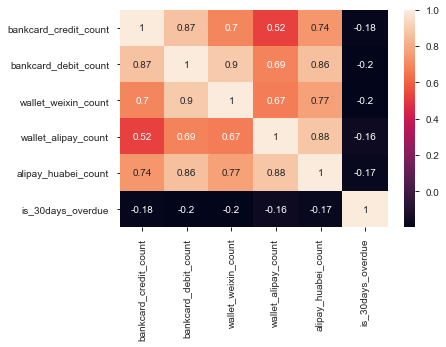

In [27]:
sns.heatmap(feature_group3.corr(),annot=True)

In [28]:
feature_group4=merge_loan[['mean_good_status','store_num','terminal_num','on_sale_or_not','mean_payer_uid','is_30days_overdue']]

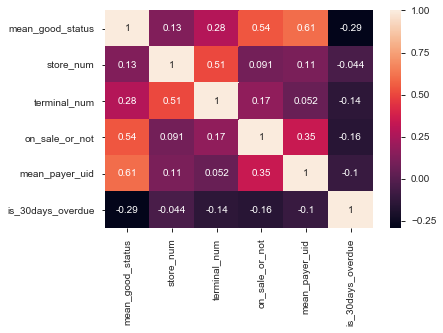

In [29]:
sns.heatmap(feature_group4.corr(),annot=True)

In [33]:
del merge_loan

## 层次聚类图

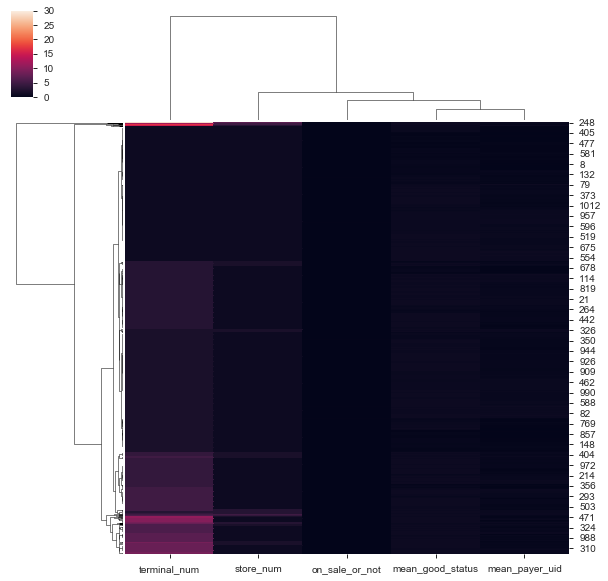

In [18]:
sns.clustermap(feature_group4)

### 导入需要的库
### 这边暂时先不卡方分箱，离群检测等，现测试一波看下准确率

In [2]:
# k 折交叉验证（k-fold cross validation
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## 选择需要的feature

In [3]:
feature=merge_loan[['I_1', 'I_2', 'I_3', 'P_1', 'P_2', 'P_3','log_sum_send_amount','lend_period','view_no',\
                    'sum_his_lend_amount', 'mean_his_overdue_times', 'sum_before_30_trans_amount', 'mean_every_day_trans_amount', 'cv_mean_every_day_trans_amount', 'sum_every_trans_amount','on_sale_rate','sum_before_30_trans_count','sum_every_trans_count','nearest_trans_day','mean_every_trans_trans_amount',\
                    'mean_good_status','store_num','terminal_num','on_sale_or_not','mean_payer_uid',\
                    'bankcard_credit_count','bankcard_debit_count','wallet_weixin_count','wallet_alipay_count','alipay_huabei_count','is_30days_overdue']]

In [18]:
feature['cv_mean_every_day_trans_amount']=feature['cv_mean_every_day_trans_amount'].fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
feature['mean_every_day_trans_amount'][feature['mean_every_day_trans_amount']==0]

54      0.0
235     0.0
355     0.0
555     0.0
1016    0.0
Name: mean_every_day_trans_amount, dtype: float64

可以看到日均交易额变异系数明显有缺失值 分析是除以均值时均值为0所致

## 用train_test_split先试一下

用f1非k折的单个决策树还有0.63

In [22]:
y = feature['is_30days_overdue']##标签
X = feature.drop(['is_30days_overdue'], axis=1).values##特征

### DecisionTree

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
train_data = feature.drop(['is_30days_overdue'], axis=1)
train_target = y
X_train, X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.25, random_state=1)
clf = DecisionTreeClassifier(max_depth=4,criterion='gini')
clf = clf.fit(X_train,y_train)
print(clf)
y_pridict = clf.predict(X_test)
f1_score(y_test,y_pridict)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.6291079812206573

#### AUC分数

In [90]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,y_pridict)
print("The AUROC=%f",roc)

The AUROC=%f 0.701532419032902


True Positive（TP）意思表示做出Positive的判定，而且判定是正确的。  
因此，TP的数值表示正确的Positive判定的个数。  
同理，False Positive（TP）数值表示错误的Positive判定的个数。  
依此，True Negative（TN）数值表示正确的Negative判定个数。   
False Negative（FN）数值表示错误的Negative判定个数。  
 
Precision、Recall、Accuracy、F1 Score（F Score） 四个概念定义：  
precision = TP / (TP + FP)   
recall = TP / (TP + FN)   
accuracy = (TP + TN) / (TP + FP + TN + FN)   
F1 Score = P*R/2(P+R)，其中P和R分别为 precision 和 recall 如果某个二元分类问题， 
训练拟合得到了几个模型假设，那么通常我们选择在验证集上，F1 Score 数值最大的那个模型假设。  

下图中  
TN FN  
FP TP  

             precision    recall  f1-score   support

          0       0.82      0.69      0.75       167
          1       0.57      0.73      0.64        93

avg / total       0.73      0.70      0.71       260

[[115  52]
 [ 25  68]]



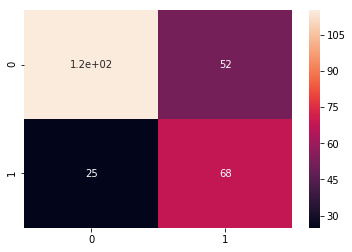

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
# y_true = [2, 1, 0, 1, 2, 0]
# y_pred = [2, 0, 0, 1, 2, 1]
print(classification_report(y_test,y_pridict))
C=confusion_matrix(y_test,y_pridict)
print(C, end='\n\n')
df_cm = pd.DataFrame(C)
sns.heatmap(df_cm,annot=True)
# y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
# y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
# C2 = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
# print(C2)


模型训练时没有偷懒，没有在较少的label上准确率低，所以直接用交叉验证不用train_test_split看效果更好一些

可以看到1被预测成1/1的总数为0.73 比真实准确率0.71高 说明预测的不错

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
train_data = feature.drop(['is_30days_overdue'], axis=1)
train_target = y
X_train, X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.25, random_state=1)
clf = RandomForestClassifier(max_depth=4,criterion='gini')
clf = clf.fit(X_train,y_train)
print(clf)
y_pridict = clf.predict(X_test)
f1_score(y_test,y_pridict)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.5604395604395604

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_data = feature.drop(['is_30days_overdue'], axis=1)
train_target = y
X_train, X_test, y_train, y_test = train_test_split(train_data,train_target,test_size=0.25, random_state=1)
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf = clf.fit(X_train,y_train)
print(clf)
y_pridict = clf.predict(X_test)
f1_score(y_test,y_pridict)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.5794392523364486

In [50]:
y_train

797     0
107     1
783     0
734     0
233     1
12      0
250     1
639     0
320     0
527     0
711     1
550     1
921     1
340     1
970     0
956     1
525     0
942     0
422     1
121     0
767     1
187     0
16      0
876     1
812     0
674     1
370     0
587     0
697     0
106     0
       ..
7       0
393     1
1019    1
141     1
86      0
864     0
478     0
503     0
753     0
1001    1
983     0
215     1
580     1
562     1
398     0
668     1
252     0
907     0
468     0
914     0
357     0
508     1
749     1
129     0
144     0
960     0
847     0
715     0
905     0
235     1
Name: is_30days_overdue, Length: 780, dtype: int64

In [ ]:
# DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
#             max_features=10, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=5, min_samples_split=10,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best')

## 交叉验证测试
 cross_val_score函数直接整合了StratifiedKFold的默认函数~

### DecisionTree,AdaBoost,RandomForest

In [68]:
from sklearn.metrics import f1_score
y = feature['is_30days_overdue']##标签
X = feature.drop(['is_30days_overdue'], axis=1).values##特征

classifiers = [DecisionTreeClassifier(max_depth=4,criterion='gini'),AdaBoostClassifier(
    random_state=2), RandomForestClassifier(random_state=2),DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4, max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=3, min_samples_split=5, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best'),
             DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3, max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=3, min_samples_split=12, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best') ]
for clf in classifiers:
    score = cross_val_score(clf, X, y, cv=10, scoring='f1')#cv=10：10 折交叉验证法，scoring='accuracy'：返回测试精度
    #因为不逾期：逾期约7:5,所以用accuracy至少会有57.2814%正确率，所以用f1进行scoring
    print([np.mean(score)])#显示测试精度平均值
    #print(f1_score(X,y))
#先adaboost再randomforest adaboost结果还好一些

[0.5914386799719347]
[0.5704082799662713]
[0.5346049043298807]
[0.5640108785686924]
[0.5775830435737831]


### 多次Adaboost

In [145]:
from sklearn.metrics import f1_score
y = feature['is_30days_overdue']##标签
X = feature.drop(['is_30days_overdue'], axis=1).values##特征

classifiers = [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),\
               DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),\
        AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=1.0, n_estimators=1, random_state=None),\
               #大多情况下最好
               AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=1.0, n_estimators=1, random_state=None),\
               AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=12, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=1, random_state=None),\
              XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)]
#RandomForestClassifier DesitionTreeClassifier 3个Adaboost XGBoost
data = {'RandomForest':[],'DesitionTree':[],'Adaboost1':[],'Adaboost2':[],'Adaboost3':[],'XGBoost':[]}
result = pd.DataFrame(data)
for i in range(7):
    list=[]
    for clf in classifiers:
        score = cross_val_score(clf, X, y, cv=10, scoring='f1')#cv=10：10 折交叉验证法，scoring='accuracy'：返回测试精度
        #因为不逾期：逾期约7:5,所以用accuracy至少会有57.2814%正确率，所以用f1进行scoring
        #print([np.mean(score)])#显示测试精度平均值
        list.append(np.mean(score))
    result.loc[i]=list
result
    #print(f1_score(X,y))
#先adaboost再randomforest adaboost结果还好一些

RandomForest  DesitionTree  Adaboost1  Adaboost2  Adaboost3   XGBoost
0      0.619503      0.564263   0.532618   0.579869   0.586894  0.599188
1      0.630274      0.564539   0.590817   0.581236   0.589593  0.599188
2      0.630867      0.544616   0.594115   0.566209   0.578479  0.599188
3      0.628147      0.549137   0.563573   0.525717   0.559777  0.599188
4      0.617550      0.572193   0.573680   0.567733   0.561072  0.599188
5      0.604245      0.563753   0.601234   0.547066   0.563356  0.599188
6      0.631666      0.546882   0.490676   0.520370   0.545420  0.599188

In [144]:
data = {'RandomForest':[],'DesitionTree':[],'Adaboost1':[],'Adaboost2':[],'Adaboost3':[],'XGBoost':[]}
# 创建一个Series对象
result = pd.DataFrame(data)
result.iloc[0,1]=1
result

IndexError: single positional indexer is out-of-bounds

### XGBoost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

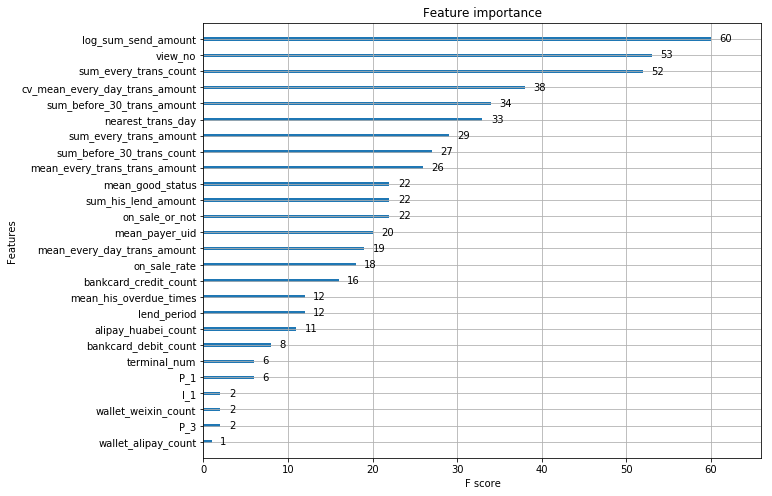

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6091954022988506

In [102]:
import xgboost as xgb#调入XGBoost模块
from xgboost import plot_importance
X = feature.drop(['is_30days_overdue'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)
feature_name = ['I_1', 'I_2', 'I_3', 'P_1', 'P_2', 'P_3','log_sum_send_amount','lend_period','view_no',\
                    'sum_his_lend_amount', 'mean_his_overdue_times', 'sum_before_30_trans_amount', 'mean_every_day_trans_amount', 'cv_mean_every_day_trans_amount', 'sum_every_trans_amount','on_sale_rate','sum_before_30_trans_count','sum_every_trans_count','nearest_trans_day','mean_every_trans_trans_amount',\
                    'mean_good_status','store_num','terminal_num','on_sale_or_not','mean_payer_uid',\
                    'bankcard_credit_count','bankcard_debit_count','wallet_weixin_count','wallet_alipay_count','alipay_huabei_count']
xgbr=xgb.XGBClassifier()#调用XGBRegressor函数‍

xgbr.fit(X_train,y_train)#拟合
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgbr,ax=ax)

plt.show()
xgbr_y_predict=xgbr.predict(X_test)#预测
f1_score(y_test,xgbr_y_predict)

# 注：由这及特征图可见第三类交易类型特征不好 可以不要！
['bankcard_credit_count','bankcard_debit_count','wallet_weixin_count','wallet_alipay_count','alipay_huabei_count'

In [105]:
X.shape[1]

30

In [87]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,xgbr_y_predict)
print("The AUROC=%f",roc)

The AUROC=%f 0.6694031292254201


In [60]:
# y=y.values

#设置待选的参数        
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
decision_tree_classifier = DecisionTreeClassifier()
parameter_grid = {'max_depth': [2,3,4,5,6], 'max_features': [5,8,10,12,14], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [5,8,10,12,14], 'min_samples_leaf': [3,4,5,7]}
cross_validation = StratifiedKFold(n_splits=10)

#将不同参数带入
gridsearch = GridSearchCV(decision_tree_classifier,
                          param_grid = parameter_grid,
                          cv = cross_validation)
gridsearch.fit(X,y)

#得分最高的参数值，并构建最佳的决策树
best_param = gridsearch.best_params_

# best_param.best_score_
# best_decision_tree_classifier = DecisionTreeClassifier(max_depth=best_param['max_depth'],
#                                                        max_features=best_param['max_features'])

TypeError: 'StratifiedKFold' object is not iterable

In [84]:
np.isnan(X).any()

False

In [41]:
y_train.shape[0]

780

In [39]:
X_train.shape[0]

780

In [42]:
X_test.shape[0]

260

In [44]:
for k, (train,test) in enumerate(kf):
    print(k,train,test)

0 [ 68  70  71  74  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 

In [47]:
from sklearn.cross_validation import StratifiedKFold
import numpy as np

scores = []
kfold = StratifiedKFold(y=y_train, n_folds=10, random_state=1) # n_folds参数设置为10份
for train_index, test_index in kfold:
    DecisionTreeClassifier(max_depth=4,criterion='gini').fit(X_train[train_index], y_train[train_index])
    score = DecisionTreeClassifier(max_depth=4,criterion='gini').score(X_train[test_index], y_train[test_index])
    scores.append(score)
    print('类别分布: %s, 准确度: %.3f' % (np.bincount(y_train[train_index]), score))

KeyError: '[ 68  70  71  74  83  84  85  86  87  88  89  90  91  92  93  94  95  96\n  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114\n 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132\n 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150\n 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168\n 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186\n 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204\n 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222\n 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240\n 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258\n 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276\n 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294\n 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312\n 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330\n 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348\n 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366\n 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384\n 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402\n 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420\n 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438\n 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456\n 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474\n 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492\n 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510\n 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528\n 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546\n 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564\n 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582\n 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600\n 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618\n 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636\n 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654\n 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672\n 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690\n 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708\n 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726\n 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744\n 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762\n 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779] not in index'

# 学习曲线 调参时画

## Adaboost

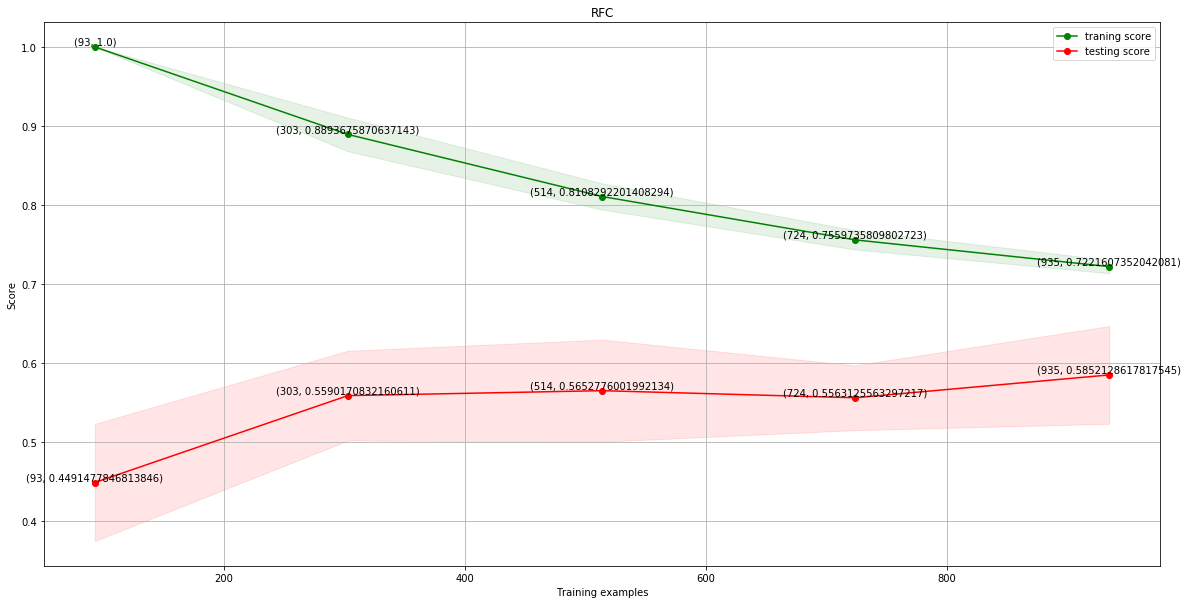

In [33]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 定义函数 plot_learning_curve 绘制学习曲线。
#train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),
#cv 初始化为 10，以后调用函数时不再输入这两个变量

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(20,10))
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes, scoring='f1')#画学习曲线 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    for a, b in zip(train_sizes, train_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    for a, b in zip(train_sizes, test_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.legend(loc='best')
    return plt

g = plot_learning_curve(AdaBoostClassifier(), 'RFC', X, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线

## 随机森林

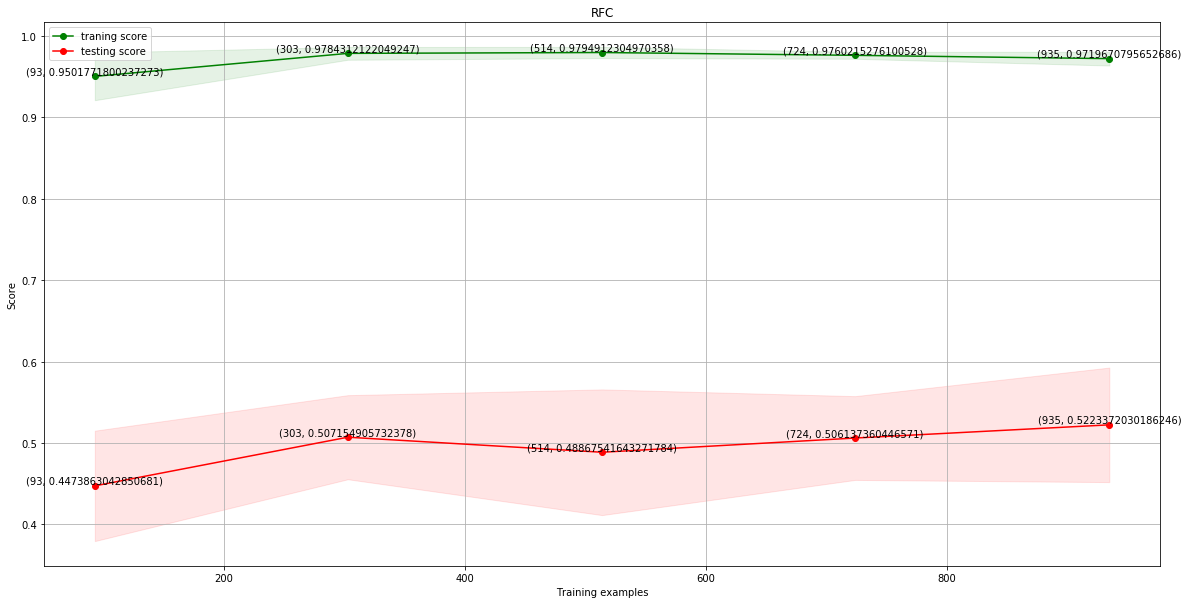

In [34]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 定义函数 plot_learning_curve 绘制学习曲线。
#train_sizes 初始化为 array([ 0.1  ,  0.325,  0.55 ,  0.775,  1\.   ]),
#cv 初始化为 10，以后调用函数时不再输入这两个变量

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(20,10))
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes, scoring='f1')#画学习曲线 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    for a, b in zip(train_sizes, train_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    for a, b in zip(train_sizes, test_scores_mean):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    plt.legend(loc='best')
    return plt
g = plot_learning_curve(RandomForestClassifier(), 'RFC', X, y) # 调用函数 plot_learning_curve 绘制随机森林学习器学习曲线

In [35]:
feature.to_csv('feature.csv')

# 决策树 集成学习 随机森林算法 参数调节

###### Python sklearn 参数调节

![image](https://doc.shiyanlou.com/document-uid598017labid4262timestamp1513834446518.png)

| 参数              |                                                        | 特点                                           |*
| ----------------- | ------------------------------------------------------ | ---------------------------------------------- |
| n_estimators      | 基学习器数目（默认值 10）                              | 基本趋势是值越大精度越高 ，直到达到一个上限    |
| criterion         | 选择算法 gini 或者 entropy (默认 gini)                 | 视具体情况定                                   |
| max_features      | 2.2.3 节中子集的大小，即 k 值（默认 sqrt(n_features)） |                                                |
| max_depth         | 决策树深度                                             | 过小基学习器欠拟合，过大基学习器过拟合。粗调节 |
| max_leaf_nodes    | 最大叶节点数（默认无限制）                             | 粗调节                                         |
| min_samples_split | 分裂时最小样本数，默认 2                               | 细调节, 越小模型越复杂                         |
| min_samples_leaf  | 叶节点最小样本数，默认 2                               | 细调节，越小模型越复杂                         |
| bootstrap         | 是否采用自助法进行样本抽样（默认使用）                 | 决定基学习器样本是否一致                       |

在以上参数中，只有 n_estimators 对精度的影响是单调的。粗调节表示参数选择跨度大，以 10、100 等为单位。细调节参数选择跨度小，以 1、2 等为单位。

 #####代码实现

 #####交叉验证法调参

首先调节：`n_estimators`，`max_depth`。首先观察特征数目，这决定了 `max_depth` 等参数的范围。然后使用交叉验证法调参。

得到最优参数 `n_estimators=60，max_depth=8`。

n_estimators:  
也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。  
一般来说n_estimators太小，容易过拟合，n_estimators太大，又容易欠拟合，一般选择一个适中的数值。默认是100。  
在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。  
max_depth  
决策树最大深度max_depth, 默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。  
一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下  
，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。  
参数效果：值越大，决策树越复杂，越容易过拟合。  

## 交叉验证法调参
首先调节：n_estimators，max_depth。首先观察特征数目，这决定了 max_depth 等参数的范围。然后使用交叉验证法调参。

得到最优参数 n_estimators=60，max_depth=8。

### DesitionTreeeClassifier

In [37]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

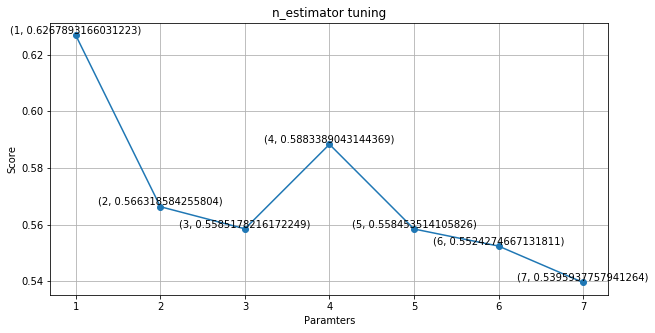

In [40]:
def para_tune(para, X, y): #
    clf = DecisionTreeClassifier(max_depth=para) # n_estimators 设置为 para
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([1,2,3,4,5,6,7], X, y, 'n_estimator tuning')

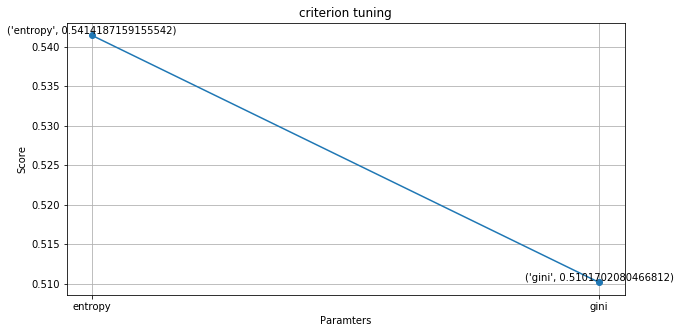

In [43]:
def para_tune(para, X, y): #
    clf = DecisionTreeClassifier(criterion=para) # n_estimators 设置为 para
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve(['entropy','gini'], X, y, 'criterion tuning')

### RandomForestClassifier

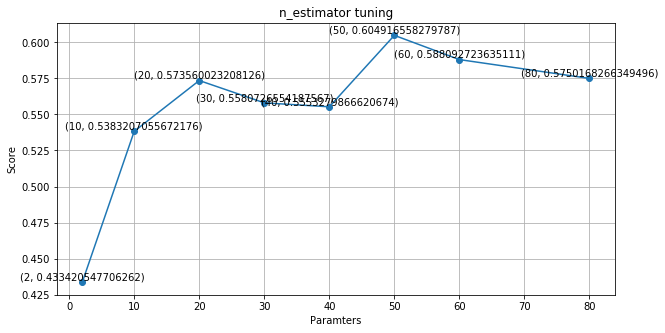

In [61]:
def para_tune(para, X, y): #
    clf = RandomForestClassifier(n_estimators=para) # n_estimators 设置为 para
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([2, 10,20,30,40, 50,60, 80], X, y, 'n_estimator tuning')

n_estimators 最优50

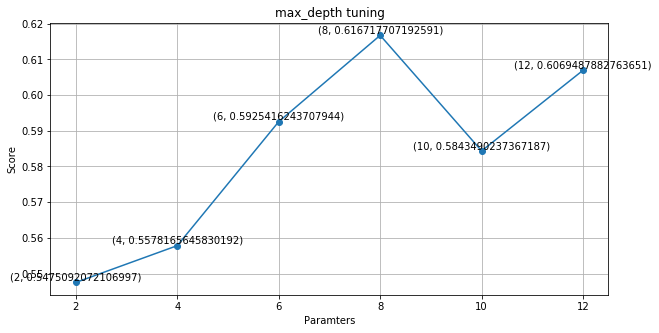

In [62]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=50, max_depth=para)
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([2,4,6, 8,10, 12], X, y, 'max_depth tuning')

max_depth=8

In [ ]:
# para_grid = {'max_depth': [6], 'n_estimators': [50], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
#              'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}#对以上参数进行网格搜索


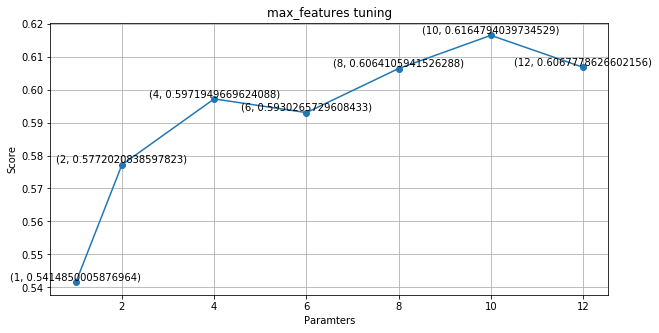

In [74]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=50,max_depth=8, max_features=para)
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([1,2,4,6, 8,10, 12], X, y, 'max_features tuning')

max_features=10

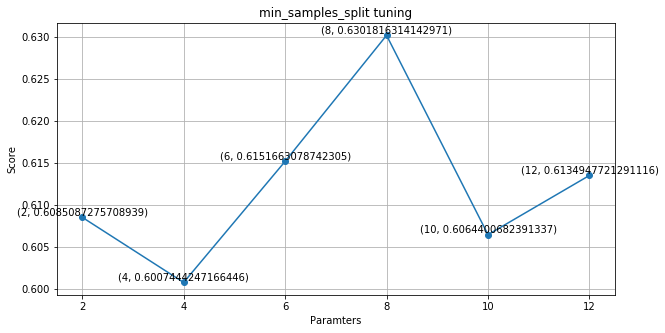

In [81]:
def para_tune(para, X, y):
    clf = RandomForestClassifier(n_estimators=50,max_depth=8,min_samples_split=para, max_features=10)
    score = np.mean(cross_val_score(clf, X, y, scoring='f1'))
    return score

def accurate_curve(para_range, X, y, title):
    score = []
    for para in para_range:
        score.append(para_tune(para, X, y))
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel('Paramters')
    plt.ylabel('Score')
    plt.grid()
    plt.plot(para_range, score, 'o-')
    for a, b in zip(para_range,  score):  
        plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
    return plt

g = accurate_curve([2,4,6, 8,10, 12], X, y, 'min_samples_split tuning')

max_features=6

### AdaboostClassifier

## scikit-learn 自动调参函数 GridSearchCV
接下来使用这个函数来选择最优的学习器，并绘制上一节实验学到的学习曲线。

观察学习曲线，训练精度随样例数目增加而减小，测试精度则增加，过拟合程度降低。并且从学习曲线的变化趋势看，测试精度将随着训练样例的数目的增加而进一步增加。实际上，决策树的深度以及基学习器的数目起主要的作用。

| 参数              |                                                        | 特点                                           |*
| ----------------- | ------------------------------------------------------ | ---------------------------------------------- |
| n_estimators      | 基学习器数目（默认值 10）                              | 基本趋势是值越大精度越高 ，直到达到一个上限    |
| criterion         | 选择算法 gini 或者 entropy (默认 gini)                 | 视具体情况定                                   |
| max_features      | 2.2.3 节中子集的大小，即 k 值（默认 sqrt(n_features)） |                                                |
| max_depth         | 决策树深度                                             | 过小基学习器欠拟合，过大基学习器过拟合。粗调节 |
| max_leaf_nodes    | 最大叶节点数（默认无限制）                             | 粗调节                                         |
| min_samples_split | 分裂时最小样本数，默认 2                               | 细调节, 越小模型越复杂                         |
| min_samples_leaf  | 叶节点最小样本数，默认 2                               | 细调节，越小模型越复杂                         |
| bootstrap         | 是否采用自助法进行样本抽样（默认使用）                 | 决定基学习器样本是否一致                       |

在以上参数中，只有 n_estimators 对精度的影响是单调的。粗调节表示参数选择跨度大，以 10、100 等为单位。细调节参数选择跨度小，以 1、2 等为单位。

### RandomForestClassifier

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6, 7], 'n_estimators': [50, 60, 70], 'max_features': [12, 15, 18], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

0.6547982243087138
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


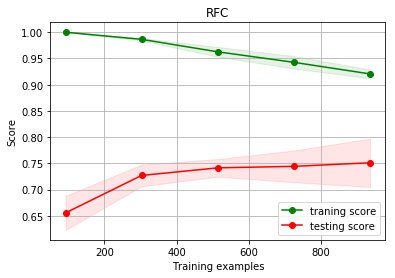

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

clf = RandomForestClassifier()
para_grid = {'max_depth': [4,5,6,7], 'n_estimators': [50,60,70], 'max_features': [12,15,18], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [2,3,4], 'min_samples_leaf': [2,3,4]}#对以上参数进行网格搜索
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='f1')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
print(gs.best_score_) #最优学习器的精度
print(gs_best)

g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线

### DesitionTreeClassifier

In [ ]:
## 输出学习器

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'max_features': [5, 8, 10, 12, 14], 'criterion': ['gini', 'entropy'], 'min_samples_split': [5, 8, 10, 12, 14], 'min_samples_leaf': [3, 4, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

0.6502680973815332
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


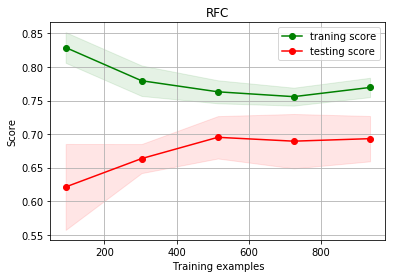

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

clf = DecisionTreeClassifier()
para_grid = {'max_depth': [2,3,4,5,6], 'max_features': [5,8,10,12,14], 'criterion': ['gini', 'entropy'],
             'min_samples_split': [5,8,10,12,14], 'min_samples_leaf': [3,4,5,7]}#对以上参数进行网格搜索
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='f1')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
print(gs.best_score_) #最优学习器的精度
print(gs_best)
g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=12,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTree的
dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


In [132]:
gs.get_params().keys()
{'estimator__max_depth': [6], 'estimator__max_features': [1, 5, 10], 'estimator__criterion': ['gini', 'entropy'],
             'estimator__min_samples_split': [2, 5, 10], 'estimator__min_samples_leaf': [1, 5, 10]}

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

### AdaBoostClassifier

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random'], 'n_estimators': [1, 2], 'base_estimator__max_depth': [5, 7, 10, 12], 'base_estimator__max_features': [7, 10, 12, 15], 'base_estimator__min_samples_split': [7, 10, 12, 15], 'base_estimator__min_samples_leaf': [1, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
      

0.6523344881267144
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=1.0, n_estimators=1, random_state=None)


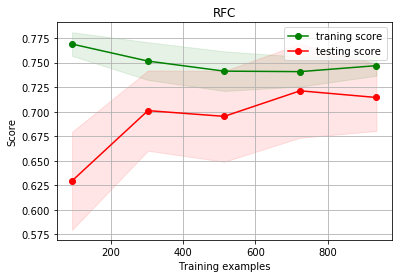

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                      alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt

# param_grid = {dtc__criterion : ["gini", "entropy"],
#               dtc__splitter :   ["best", "random"],
#               abc__n_estimators: [none, 1, 2]
#              }
# DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)
# ABC = AdaBoostClassifier(base_estimator = DTC)
# # run grid search
# grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')


clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# para_grid = {'max_depth': [10], 'n_estimators': [100], 'max_features': [1, 5, 10], 'criterion': ['gini', 'entropy'],
#              'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}#对以上参数进行网格搜索
para_grid ={"base_estimator__criterion": ["gini", "entropy"],
          "base_estimator__splitter":   ["best", "random"],
          "n_estimators": [1, 2],'base_estimator__max_depth': [5,7,10,12], 'base_estimator__max_features': [7,10,12,15],
             'base_estimator__min_samples_split': [7,10,12,15], 'base_estimator__min_samples_leaf': [1,2,3,5]}
# class_weight=None, criterion='gini', max_depth=None,
#             max_features=None, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best'),
#           learning_rate=1.0, n_estimators=50, random_state=None
gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='f1')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
print(gs.best_score_) #最优学习器的精度
print(gs_best)

g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线

In [114]:
gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__base_estimator__class_weight', 'estimator__base_estimator__criterion', 'estimator__base_estimator__max_depth', 'estimator__base_estimator__max_features', 'estimator__base_estimator__max_leaf_nodes', 'estimator__base_estimator__min_impurity_decrease', 'estimator__base_estimator__min_impurity_split', 'estimator__base_estimator__min_samples_leaf', 'estimator__base_estimator__min_samples_split', 'estimator__base_estimator__min_weight_fraction_leaf', 'estimator__base_estimator__presort', 'estimator__base_estimator__random_state', 'estimator__base_estimator__splitter', 'estimator__base_estimator', 'estimator__learning_rate', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [130]:

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=para_grid, cv=3, scoring='f1')
gs.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

### XGBoost

In [ ]:
from xgboost import XGBClassifier
clf1 = XGBClassifier(max_depth=6,n_estimators=200)#.fit(train_data,train_label)
score1 =cross_val_score(clf1,X,y,cv=5,scoring='f1')
print(np.mean( score1))

clf2 = XGBClassifier(max_depth=4,n_estimators=292)#.fit(train_data,train_label)
score2 = cross_val_score(clf2,X,y,cv=5,scoring='f1')
print (np.mean(score2))

In [64]:
from xgboost import XGBClassifier

In [65]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGB需要调整的参数  

max_depth = 5 :  
和GBM中的参数相同，这个值为树的最大深度。  
这个值也是用来避免过拟合的。max_depth越大，模型会学到更具体更局部的样本。  
需要使用CV函数来进行调优。  
典型值：3-10  
min_child_weight = 1:  
决定最小叶子节点样本权重和。  
和GBM的 min_child_leaf 参数类似，但不完全一样。XGBoost的这个参数是最小样本权重的和，而GBM参数是最小样本总数。  
这个参数用于避免过拟合。当它的值较大时，可以避免模型学习到局部的特殊样本。  
但是如果这个值过高，会导致欠拟合。这个参数需要使用CV来调整。  
gamma = 0:  
在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点。Gamma指定了节点分裂所需的最小损失函数下降值。  
这个参数的值越大，算法越保守。这个参数的值和损失函数息息相关，所以是需要调整的。  
subsample：  
和GBM中的subsample参数一模一样。这个参数控制对于每棵树，随机采样的比例。  
减小这个参数的值，算法会更加保守，避免过拟合。但是，如果这个值设置得过小，它可能会导致欠拟合。  
典型值：0.5-1  
 colsample_bytree：  
和GBM里面的max_features参数类似。用来控制每棵随机采样的列数的占比(每一列是一个特征)。  
典型值：0.5-  
scale_pos_weight = 1:  
在各类别样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛。  
以上是我们要进行调参的部分来优化结果（当然有时候n_estimators(迭代次数）也能起到优化作用）  
一下过程我们用一步步修改的方法，来查看结果，用for 函数来列举各个调参过程，for函数我就不列举了，直接通过for得出的结果给大家列举最有参数。当然你也可以不用for 来做，可以用sklearn.moedel_selection的  GridSearchCV来快速调参。  

我们先从n_estimators  来定  

'n_estimators':[100,200,500,1000,1500]  

n_estimators:[500] (500,600,700,800)

min_child_weight:[2] (1,3,5)

max_depth:[6] (3-10)

gamma:[0]

subsample:[1] (0.5-1)

colsample_bytree:[0.7] (0.5-1)

reg_alpha:[0] (0.01,0.5,1)

reg_lambda:[1] （0.01-0.1，1）

‍learning_rate:[0.05] (0.01-0.3)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 300, 350], 'max_depth': [2, 3], 'colsample_bytree': [0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

0.6206272111703376
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)


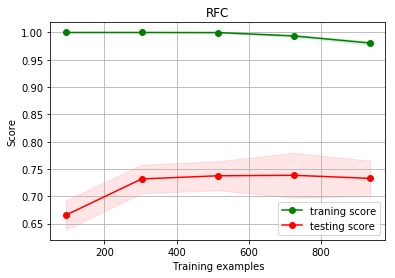

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
def plot_learning_curve(estimator, title, X, y, cv=10,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title) # 设置图的 title
    plt.xlabel('Training examples') # 横坐标
    plt.ylabel('Score') # 纵坐标
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                                                            train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) # 计算平均值
    train_scores_std = np.std(train_scores, axis=1) # 计算标准差
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid() # 设置背景的网格

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='g') # 设置颜色
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                      alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label='traning score') # 绘制训练精度曲线
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label='testing score') # 绘制测试精度曲线
    plt.legend(loc='best')
    return plt


clf = XGBClassifier()
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
#        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#        n_estimators=100, n_jobs=1, nthread=None,
#        objective='binary:logistic', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#        subsample=1, verbosity=1)
para_grid ={"n_estimators":[250,300,350],"max_depth":[2,3],'colsample_bytree':[0.7]}

gs = GridSearchCV(clf, param_grid=para_grid, cv=3, scoring='f1')
gs.fit(X, y)
gs_best = gs.best_estimator_ #选择出最优的学习器
print(gs.best_score_) #最优学习器的精度
print(gs_best)

g = plot_learning_curve(gs_best, 'RFC', X, y)#调用实验2中定义的 plot_learning_curve 绘制学习曲线

In [111]:
gs_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

## 其他方式交叉验证的过程
#### cv=None 交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield训练/测试数据的生成器。

### GradientBoostingClassifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(max_depth=3,n_estimators=289)#.fit(train_data,train_label) 

np.mean(cross_val_score(clf1,X,y,cv=5,scoring='f1'))

0.6216720682508133

#### 解释为什么所有地方都用f1而不用precision

常用的是 ‘precision’ 和 ’recall‘ 和 ’f1，三者的关系可以用下图来表示

 ![img](https://img-blog.csdn.net/20180924203640831?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzMyNTkwNjMx/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70) 

假设这是一个二元分类的问题

准确率（precision）也就是被分类器检测到的数据中 分类正确的部分

召回率（recall）就是 正类中被分类正确的部分

而F1值就是 准确率和召回率的调和平均数

在实际应用中，如果是做搜索类的问题，那就是在保证召回率的情况下提升准确率

在做垃圾邮件检测之类的问题，就是要保证准确率的情况下提升召回率

具体也就是遇到具体问题看两者的权衡

如果两者都要求高，那就需要保证较高的F1 score


机器学习中的 precision、recall、accuracy、F1 Score
1. 四个概念定义：TP、FP、TN、FN
先看四个概念定义： 
- TP，True Positive 
- FP，False Positive 
- TN，True Negative 
- FN，False Negative

如何理解记忆这四个概念定义呢？

举个简单的二元分类问题 例子：

假设，我们要对某一封邮件做出一个判定，判定这封邮件是垃圾邮件、还是这封邮件不是垃圾邮件？

如果判定是垃圾邮件，那就是做出（Positive）的判定； 
如果判定不是垃圾邮件，那就做出（Negative）的判定。

True Positive（TP）意思表示做出Positive的判定，而且判定是正确的。因此，TP的数值表示正确的Positive判定的个数。 
同理，False Positive（TP）数值表示错误的Positive判定的个数。 
依此，True Negative（TN）数值表示正确的Negative判定个数。 
False Negative（FN）数值表示错误的Negative判定个数。

2. Precision、Recall、Accuracy、F1 Score（F Score）
四个概念定义：

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + FP + TN + FN)
F1 Score = P*R/2(P+R)，其中P和R分别为 precision 和 recall
如果某个二元分类问题，训练拟合得到了几个模型假设，那么通常我们选择在验证集上，F1 Score 数值最大的那个模型假设。

### XGBClassifier

In [124]:
from xgboost import XGBClassifier
clf1 = XGBClassifier(max_depth=6,n_estimators=200)#.fit(train_data,train_label)
score1 =cross_val_score(clf1,X,y,cv=5,scoring='f1')
print(np.mean( score1))

clf2 = XGBClassifier(max_depth=4,n_estimators=292)#.fit(train_data,train_label)
score2 = cross_val_score(clf2,X,y,cv=5,scoring='f1')
print (np.mean(score2))

0.5764246670682522
0.6095176280011495


### SVC

In [121]:
from sklearn.svm import SVC
# from sklearn.datasets import make_blobs

# X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.3)

clf = SVC(C = 1.0, kernel='linear')
clf.fit(X,y)

print(clf.score(X,y))
plt.figure(figsize=(10,3), dpi=100)
plot_hyperplane(clf, X, y, h=0.01, title='Maximiin Margin Hyperplan')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7326923076923076


<Figure size 1000x300 with 0 Axes>

NameError: name 'plot_hyperplane' is not defined

<Figure size 1000x300 with 0 Axes>

In [120]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf', C=16, gamma=0.18)#.fit(train_data,train_label)
score1 = cross_val_score(clf1,X,y,cv=5,scoring='f1')
print(np.mean( score1))

clf2 = SVC(kernel='rbf', C=94.75, gamma=0.17)#.fit(train_data,train_label)
score3 = cross_val_score(clf2,X,y,cv=5,scoring='f1')
print (np.mean(score2))

0.0


NameError: name 'clf2' is not defined

### 再次RandomForest

In [155]:
score2 = cross_val_score(clf,X,y,cv=5,scoring='f1')
print (np.mean(score2))

0.49612341880196986


# 最终预测

In [157]:
clf.predict(X)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [156]:
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
#在测试集上测试最优的模型的泛化能力.
y_true, y_pred = y, clf.predict(X)
print(classification_report(y_true, y_pred))

The model is trained on the full development set.
The scores are computed on the full evaluation set.



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [183]:
#用sklearn的SVC方法来训练数据集，并交叉验证预测精度  
from sklearn import metrics  
# import matplotlib.pyplot as plt  
# import pandas as pd  
  
# tbl = pd.read_csv("./data/bmi.csv")  
# #读取数据  
  
# label = tbl["label"]  
# #读取数据中的标签列  
# w = tbl["weight"] / 100   
# h = tbl["height"] / 200   
# wh = pd.concat([w, h], axis=1)  
  
# data_train, data_test, label_train, label_test = cross_validation.train_test_split(wh, label)  
# #将数据分成两组数据集和测试集  
print(clf)
# # clf = svm.SVC()  
# clf.fit(X,y)  
# #训练数据  
  
predict = clf.predict(X)  
#预测数据  
print(str(predict.tolist()).count("0"))
print(str(predict.tolist()).count("1"))
ac_score = metrics.accuracy_score(y, predict)  
# #生成测试精度  
cl_report = metrics.classification_report(y, predict)  
# #生成交叉验证的报告  
print(ac_score)  
# #显示数据精度  
print(cl_report)  
# #显示交叉验证数据集报告  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
695
345
0.9836538461538461
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       682
          1       0.99      0.96      0.98       358

avg / total       0.98      0.98      0.98      1040



In [198]:
from scipy import integrate
import numpy as np

def f(x):
    return (pow(x,3)*np.cos(x/2)+1/2)*np.sqrt(4-pow(x,2))
x = np.linspace(-2,2,1000)
y = f(x)
v = integrate.trapz(y, x)
print(v)


3.1414873190462855
